In [1]:
!pip install pydub

In [2]:
from pydub import AudioSegment

In [6]:
from pydub.playback import play

**Задача 1**

При помощи библиотеки pydub откройте файл blues.au и воспроизведите только последние 10 секунд аудиозаписи.

In [3]:
music_au = AudioSegment.from_file(file='/content/blues.au', format='au')

In [9]:
# Длина аудиофайла в миллисекундах
audio_length = len(music_au)

# Последние 10 секунд
last_10_seconds = music_au[-10000:]

# Воспроизведение последних 10 секунд
last_10_seconds

**Задача 2**

При помощи библиотеки pydub откройте файл blues.au и увеличьте громкость на 10 dB.

In [10]:
# Загрузка аудиофайла
audio = AudioSegment.from_file("blues.au")

# Увеличение громкости на 10 dB
louder_audio = audio + 10

# Сохранение измененного аудио
louder_audio.export("blues_louder.au", format="au")

<_io.BufferedRandom name='blues_louder.au'>

**Задача 3**

При помощи библиотеки pydub откройте файл blues.au, выполните реверс аудиофайла и объедините с исходным файлом последовательно.

In [11]:
audio = AudioSegment.from_file("blues.au")

# Выполнение реверса аудио
reversed_audio = audio.reverse()

# Объединение исходного и реверсированного аудио последовательно
combined_audio = audio + reversed_audio

# Сохранение результирующего аудио
combined_audio.export("blues_combined.au", format="au")

<_io.BufferedRandom name='blues_combined.au'>

**Задача 4**

При помощи библиотеки librosa откройте файл blues.au и выведите на экран последние 10 секунд временного ряда аудио.

In [12]:
import librosa

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filename = 'blues.au'
y, sr = librosa.load(filename, sr=None)

# Длительность аудиофайла в секундах
duration = librosa.get_duration(y=y, sr=sr)

# Длительность в сэмплах
duration_samples = len(y)

# Последние 10 секунд в сэмплах
last_10_seconds_samples = int(sr * 10)

# Извлечение последних 10 секунд временного ряда
last_10_seconds = y[-last_10_seconds_samples:]

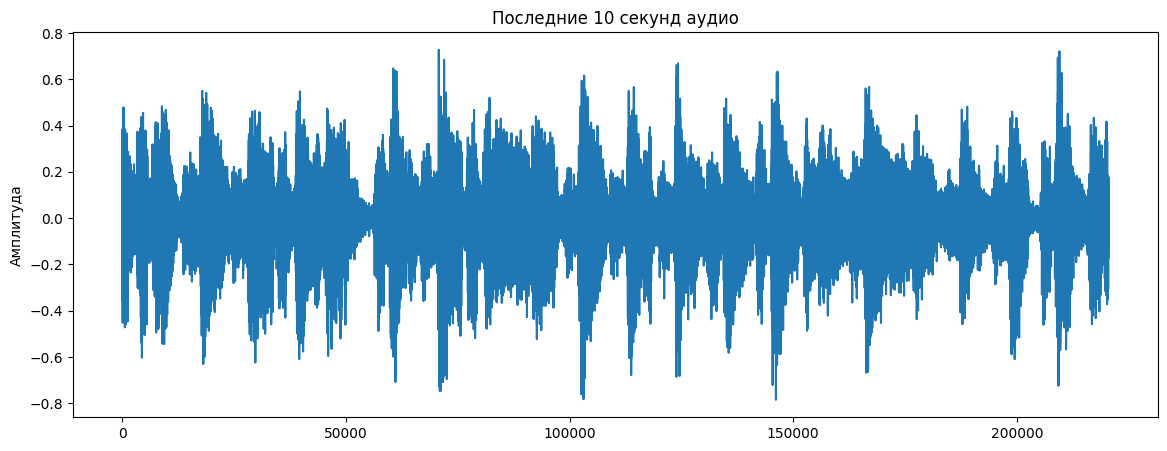

In [17]:
# Вывод временного ряда
plt.figure(figsize=(14, 5))
plt.plot(last_10_seconds)
plt.title('Последние 10 секунд аудио')
plt.ylabel('Амплитуда')
plt.show()

**Задача 5**

При помощи библиотеки librosa откройте файл blues.au и выведите на экран последние 10 секунд аудио в виде спектрограммы.

In [18]:
filename = 'blues.au'
y, sr = librosa.load(filename, sr=None)

# Длительность в сэмплах
duration_samples = len(y)

# Последние 10 секунд в сэмплах
last_10_seconds_samples = int(sr * 10)

# Извлечение последних 10 секунд временного ряда
last_10_seconds = y[-last_10_seconds_samples:]

# Построение спектрограммы
D = librosa.amplitude_to_db(np.abs(librosa.stft(last_10_seconds)), ref=np.max)

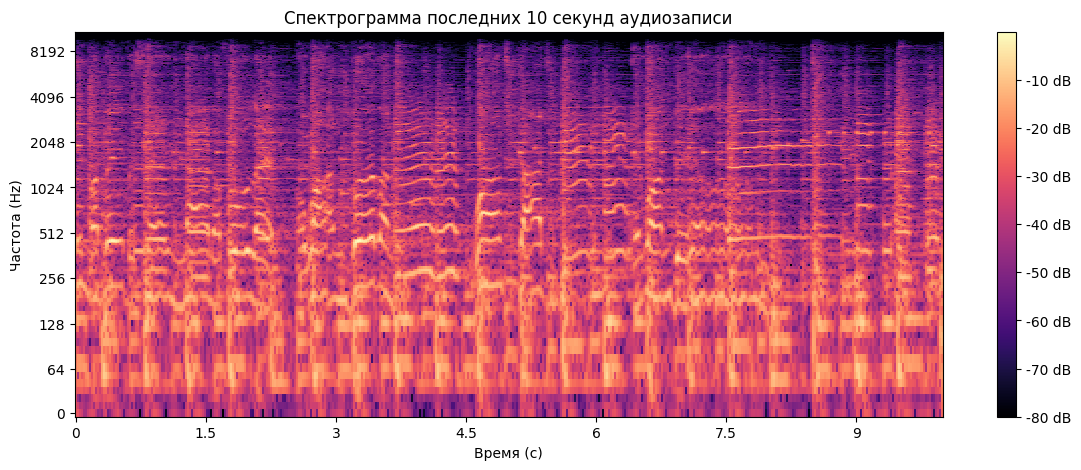

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограмма последних 10 секунд аудиозаписи')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Hz)')
plt.show()